# GEELY AUTO-ASSIGNMENT

### Data Loading

#### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings

#### Import Dataset

In [2]:
auto_dat=pd.read_csv('CarPrice_Assignment.csv')
auto_dat.shape
auto_dat.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Check the dataset dimensions and other features

In [3]:
auto_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

##### Total 26 columns, 16 numeric and 10 object type

### Data Cleaning and Univariate analysis

#### Check for any missing(Null/Nan) values

In [4]:
auto_dat_col_count=auto_dat.apply(lambda x: sum(x.isnull()) ,axis = 0)
type(auto_dat_col_count)

pandas.core.series.Series

In [5]:
auto_dat_col_count[auto_dat_col_count != 0]

Series([], dtype: int64)

In [6]:
gh=auto_dat.CarName.str.split(' ',1).tolist()

In [7]:
gh

[['alfa-romero', 'giulia'],
 ['alfa-romero', 'stelvio'],
 ['alfa-romero', 'Quadrifoglio'],
 ['audi', '100 ls'],
 ['audi', '100ls'],
 ['audi', 'fox'],
 ['audi', '100ls'],
 ['audi', '5000'],
 ['audi', '4000'],
 ['audi', '5000s (diesel)'],
 ['bmw', '320i'],
 ['bmw', '320i'],
 ['bmw', 'x1'],
 ['bmw', 'x3'],
 ['bmw', 'z4'],
 ['bmw', 'x4'],
 ['bmw', 'x5'],
 ['bmw', 'x3'],
 ['chevrolet', 'impala'],
 ['chevrolet', 'monte carlo'],
 ['chevrolet', 'vega 2300'],
 ['dodge', 'rampage'],
 ['dodge', 'challenger se'],
 ['dodge', 'd200'],
 ['dodge', 'monaco (sw)'],
 ['dodge', 'colt hardtop'],
 ['dodge', 'colt (sw)'],
 ['dodge', 'coronet custom'],
 ['dodge', 'dart custom'],
 ['dodge', 'coronet custom (sw)'],
 ['honda', 'civic'],
 ['honda', 'civic cvcc'],
 ['honda', 'civic'],
 ['honda', 'accord cvcc'],
 ['honda', 'civic cvcc'],
 ['honda', 'accord lx'],
 ['honda', 'civic 1500 gl'],
 ['honda', 'accord'],
 ['honda', 'civic 1300'],
 ['honda', 'prelude'],
 ['honda', 'accord'],
 ['honda', 'civic'],
 ['honda', '

#### Seperate manufacturer and model type from the Car name

In [8]:
auto_dat[['brand','model']] = pd.DataFrame(gh,
                                   columns = ['brand','model'])
auto_dat.brand=auto_dat.brand.astype('str')

#### Remove any duplications by getting the naming convention to a single string

In [9]:
auto_dat.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [10]:
auto_dat.brand=auto_dat.brand.replace('maxda','mazda')
auto_dat.brand=auto_dat.brand.replace('nissan','Nissan')
auto_dat.brand=auto_dat.brand.replace('porcshce','porsche')
auto_dat.brand=auto_dat.brand.replace('toyouta','toyota')
auto_dat.brand=auto_dat.brand.replace('vokswagen','volkswagen')
auto_dat.brand=auto_dat.brand.replace('vw','volkswagen')
auto_dat.brand=auto_dat.brand.replace('alfa-romero','alfa-romeo')

#### Check distribution of manufacturers

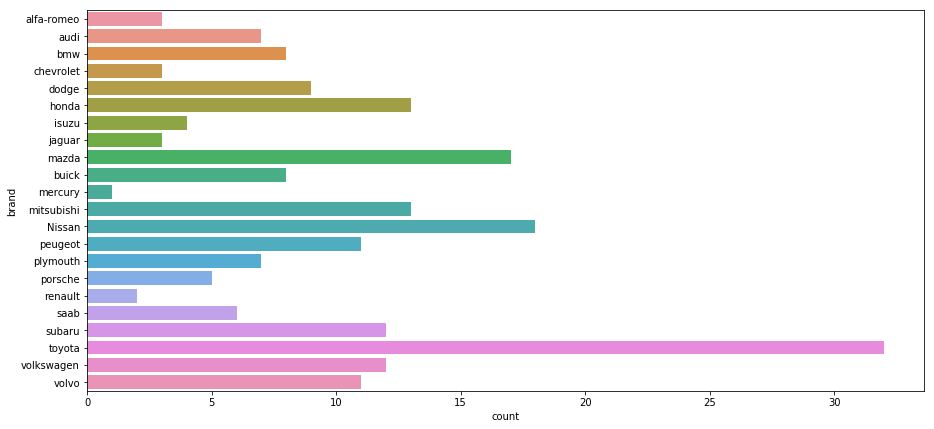

In [11]:
plt.figure(figsize=(15,7))
sns.countplot(y=auto_dat.brand)
plt.show()

#### Making data better by replacing categorical variable values

In [12]:
auto_dat.doornumber=auto_dat.doornumber.map({'two': 2, 'four': 4})

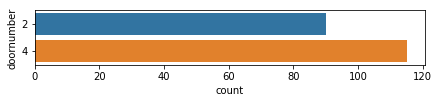

In [13]:
plt.figure(figsize=(7,1))
sns.countplot(y=auto_dat.doornumber)
plt.show()

#### Check distribution of different categorical variables with only 2 values

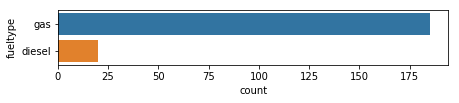

In [14]:
plt.figure(figsize=(7,1))
sns.countplot(y=auto_dat.fueltype)
plt.show()

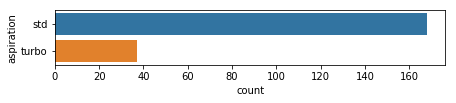

In [15]:
plt.figure(figsize=(7,1))
sns.countplot(y=auto_dat.aspiration)
plt.show()

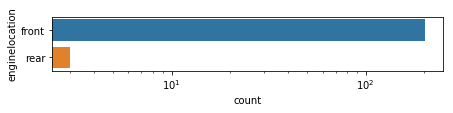

In [16]:
plt.figure(figsize=(7,1))
sns.countplot(y=auto_dat.enginelocation)
plt.xscale('log')
plt.show()

#### Convert Symboling ranging (-3,3) to (0,6) for easier analysi, where 6 being the highest risk and 0 is the lowest

In [17]:
auto_dat.symboling.unique()



array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [18]:
auto_dat.symboling=auto_dat.symboling.apply(lambda x : x+3)

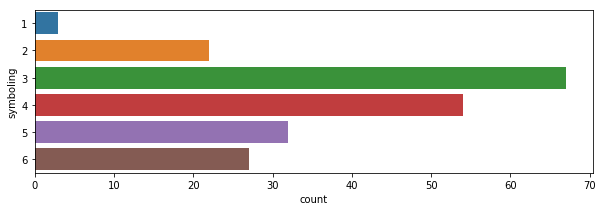

In [19]:
plt.figure(figsize=(10,3))
sns.countplot(y=auto_dat.symboling)
plt.show()

#### Replace cylinder number from string to numeric data

In [20]:
str_list=list(auto_dat.cylindernumber.unique())
num_list=list(['4','6','5','3','12','2','8'])
auto_dat.cylindernumber=auto_dat.cylindernumber.replace(str_list,num_list)
auto_dat.cylindernumber=auto_dat.cylindernumber.astype('int')

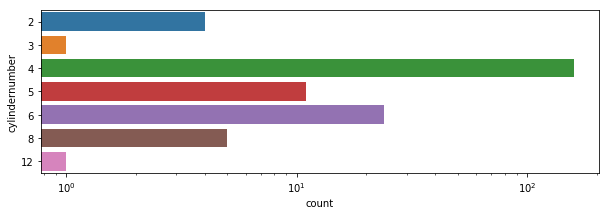

In [21]:
plt.figure(figsize=(10,3))
sns.countplot(y=auto_dat.cylindernumber)
plt.xscale('log')
plt.show()

#### Fuel system type distribution

In [22]:
print(auto_dat.fuelsystem.unique())

['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


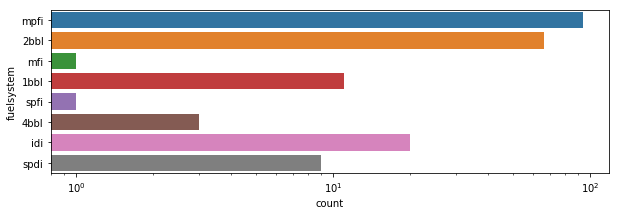

In [23]:
plt.figure(figsize=(10,3))
sns.countplot(y=auto_dat.fuelsystem)
plt.xscale('log')
plt.show()

#### Checking distribution of other categorical variables

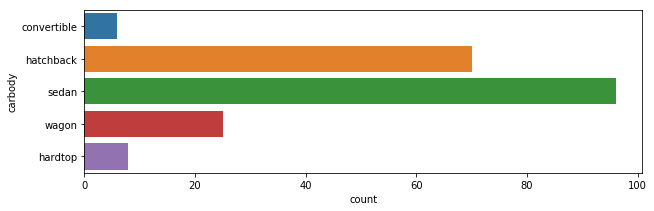

In [24]:
plt.figure(figsize=(10,3))
sns.countplot(y=auto_dat.carbody)
plt.show()

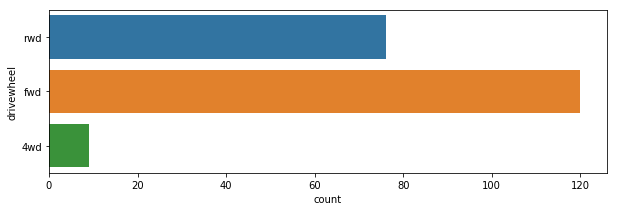

In [25]:
plt.figure(figsize=(10,3))
sns.countplot(y=auto_dat.drivewheel)
plt.show()

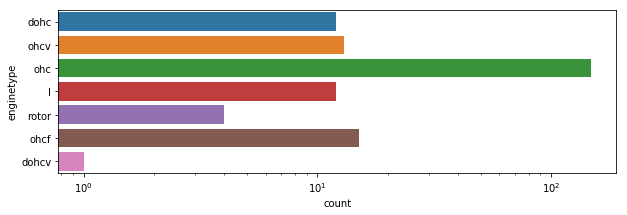

In [26]:
plt.figure(figsize=(10,3))
sns.countplot(y=auto_dat.enginetype)
plt.xscale('log')
plt.show()

#### Outliers treatment

##### Treating enginesize

In [27]:
high_quantiles_eniginesize = auto_dat.enginesize.quantile(0.96)
outliers_high_eniginesize = (auto_dat.enginesize > high_quantiles_eniginesize)
auto_dat.enginesize[outliers_high_eniginesize] = np.nan
auto_dat.fillna(high_quantiles_eniginesize, inplace=True)
pd.options.mode.chained_assignment = None



C:\Users\adity\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


##### Treating horsepower

In [28]:
high_quantiles_horsepower = auto_dat.horsepower.quantile(0.97)
outliers_high_horsepower = (auto_dat.horsepower > high_quantiles_horsepower)
auto_dat.horsepower[outliers_high_horsepower] = np.nan
auto_dat.fillna(high_quantiles_horsepower, inplace=True)

##### Treating compressionratio

In [29]:
high_quantiles_compressionratio = auto_dat.compressionratio.quantile(0.90)
outliers_high_compressionratio = (auto_dat.compressionratio > high_quantiles_compressionratio)
auto_dat.compressionratio[outliers_high_compressionratio] = np.nan
auto_dat.fillna(high_quantiles_compressionratio, inplace=True)

##### Treating carwidth

In [30]:
high_quantiles_carwidth = auto_dat.carwidth.quantile(0.95)
outliers_high_carwidth = (auto_dat.carwidth > high_quantiles_carwidth)
auto_dat.carwidth[outliers_high_carwidth] = np.nan
auto_dat.fillna(high_quantiles_carwidth, inplace=True)

##### Treating carlength

In [31]:
high_quantiles_carlength = auto_dat.carlength.quantile(0.95)
outliers_high_carlength = (auto_dat.carlength > high_quantiles_carlength)
auto_dat.carlength[outliers_high_carlength] = np.nan
auto_dat.fillna(high_quantiles_carlength, inplace=True)

##### Treating carheight

In [32]:
high_quantiles_carheight = auto_dat.carheight.quantile(0.95)
outliers_high_carheight = (auto_dat.carheight > high_quantiles_carheight)
auto_dat.carheight[outliers_high_carheight] = np.nan
auto_dat.fillna(high_quantiles_carheight, inplace=True)

##### Treating curbweight

In [33]:
high_quantiles_curbweight = auto_dat.curbweight.quantile(0.95)
outliers_high_curbweight = (auto_dat.curbweight > high_quantiles_curbweight)
auto_dat.curbweight[outliers_high_curbweight] = np.nan
auto_dat.fillna(high_quantiles_curbweight, inplace=True)

#### Check correlation of each variable

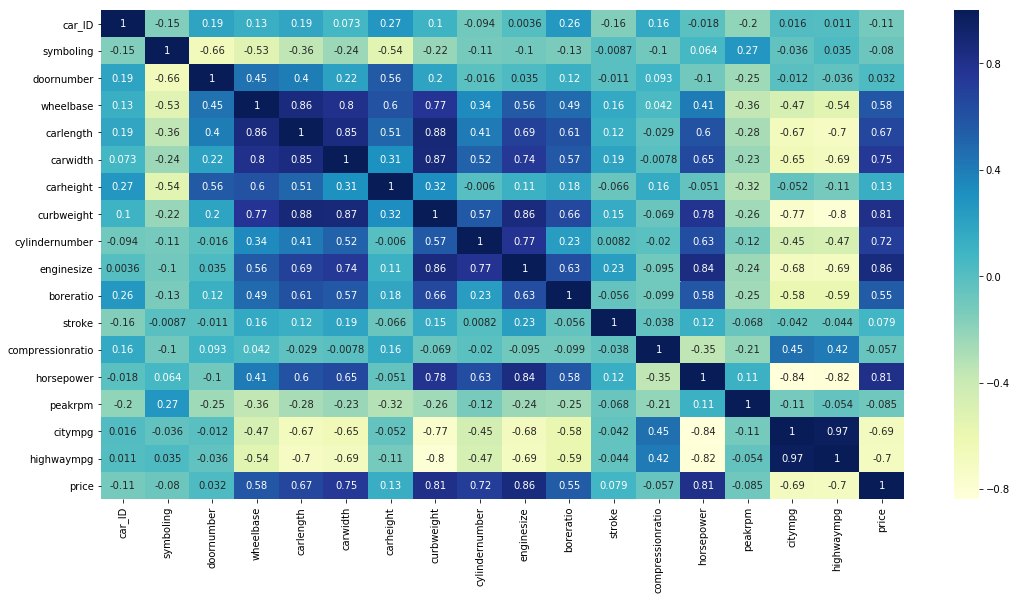

In [34]:
plt.figure(figsize=(18,9))
corr = auto_dat.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap='YlGnBu',annot=True)
plt.show()

#### Replace cylinder number from string to numeric data

In [35]:
str_list=list(auto_dat.cylindernumber.unique())
str_list

[4, 6, 5, 3, 12, 2, 8]

In [36]:
num_list=list(['4','6','5','3','12','2','8'])
auto_dat.cylindernumber=auto_dat.cylindernumber.replace(str_list,num_list)
auto_dat.cylindernumber=auto_dat.cylindernumber.astype('int')

#### Creating new metrics and removing old ones which have high correlation

##### citympg and highwaympg are highly correlated(0.97) and hence we can create new metric with ratio

In [37]:
auto_dat['citytohwratio']=(auto_dat.citympg/auto_dat.highwaympg)
auto_dat=auto_dat.drop(['citympg','highwaympg'],axis=1)

##### enginesize and curbweight are highly correlated(0.9) and hence we can create new metric with ratio

In [38]:
auto_dat['sizecurbwratio']=(auto_dat.enginesize/auto_dat.curbweight)
auto_dat=auto_dat.drop(['enginesize','curbweight'],axis=1)

##### carlength and wheelbase are highly correlated(0.86) and hence we can create new metric with ratio

In [39]:
auto_dat['lenbaseratio']=(auto_dat.carlength/auto_dat.wheelbase)
auto_dat=auto_dat.drop(['carlength','wheelbase'],axis=1)

#### Drop columns which will not help further for analysis

In [40]:
auto_dat=auto_dat.drop(['CarName','model','car_ID'],axis=1)

#### Setting variables with only 2 values to 0s and 1s

In [41]:
fuel = pd.get_dummies(auto_dat['fueltype'],drop_first=True)
aspiration = pd.get_dummies(auto_dat['aspiration'],drop_first=True)
enginelocation = pd.get_dummies(auto_dat['enginelocation'],drop_first=True)

In [42]:
auto_dat = pd.concat([auto_dat,fuel],axis=1)
auto_dat = pd.concat([auto_dat,aspiration],axis=1)
auto_dat = pd.concat([auto_dat,enginelocation],axis=1)

#### Converting model to dummies

In [43]:
brand = pd.get_dummies(auto_dat['brand'],drop_first=True)
auto_dat = pd.concat([auto_dat,brand],axis=1)
auto_dat=auto_dat.drop(['brand'],axis=1)

In [44]:
carbody = pd.get_dummies(auto_dat['carbody'],drop_first=True)
auto_dat = pd.concat([auto_dat,carbody],axis=1)
auto_dat=auto_dat.drop(['carbody'],axis=1)

In [45]:
drivewheel = pd.get_dummies(auto_dat['drivewheel'],drop_first=True)
auto_dat = pd.concat([auto_dat,drivewheel],axis=1)
auto_dat=auto_dat.drop(['drivewheel'],axis=1)

In [46]:
enginetype = pd.get_dummies(auto_dat['enginetype'],drop_first=True)
auto_dat = pd.concat([auto_dat,enginetype],axis=1)
auto_dat=auto_dat.drop(['enginetype'],axis=1)

In [47]:
fuelsystem = pd.get_dummies(auto_dat['fuelsystem'],drop_first=True)
auto_dat = pd.concat([auto_dat,fuelsystem],axis=1)
auto_dat=auto_dat.drop(['fuelsystem'],axis=1)

#### Drop columns for which dummy are created

In [48]:
auto_dat=auto_dat.drop(['fueltype','aspiration','enginelocation'],axis=1)

In [49]:
auto_dat.head()

,symboling,doornumber,carwidth,carheight,cylindernumber,boreratio,stroke,compressionratio,horsepower,peakrpm,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,6,2,64.1,48.8,4,3.47,2.68,9.0,111.0,5000,...,0,0,0,0,0,0,0,1,0,0
1,6,2,64.1,48.8,4,3.47,2.68,9.0,111.0,5000,...,0,0,0,0,0,0,0,1,0,0
2,4,2,65.5,52.4,6,2.68,3.47,9.0,154.0,5000,...,0,1,0,0,0,0,0,1,0,0
3,5,4,66.2,54.3,4,3.19,3.40,10.0,102.0,5500,...,0,0,0,0,0,0,0,1,0,0
4,5,4,66.4,54.3,5,3.19,3.40,8.0,115.0,5500,...,0,0,0,0,0,0,0,1,0,0


#### Normalize/Standardize variables

In [59]:
def standardize (x): 
    return ( (x-np.mean(x))/ (max(x) - min(x)))
auto_dat = auto_dat.apply(standardize) 

In [60]:
auto_dat.columns

Index(['symboling', 'doornumber', 'carwidth', 'carheight', 'cylindernumber',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'price', 'citytohwratio', 'sizecurbwratio', 'lenbaseratio', 'gas',
       'turbo', 'rear', 'alfa-romeo', 'audi', 'bmw', 'buick', 'chevrolet',
       'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd',
       'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', '2bbl', '4bbl',
       'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

#### Checking correlation of brand with price

In [61]:
models=auto_dat[['alfa-romeo','audi','bmw','buick','chevrolet','dodge',
                'honda','isuzu','jaguar','mazda','mercury','mitsubishi',
                'peugeot','plymouth','porsche','renault','saab','subaru',
                'toyota','volkswagen','volvo','price']]

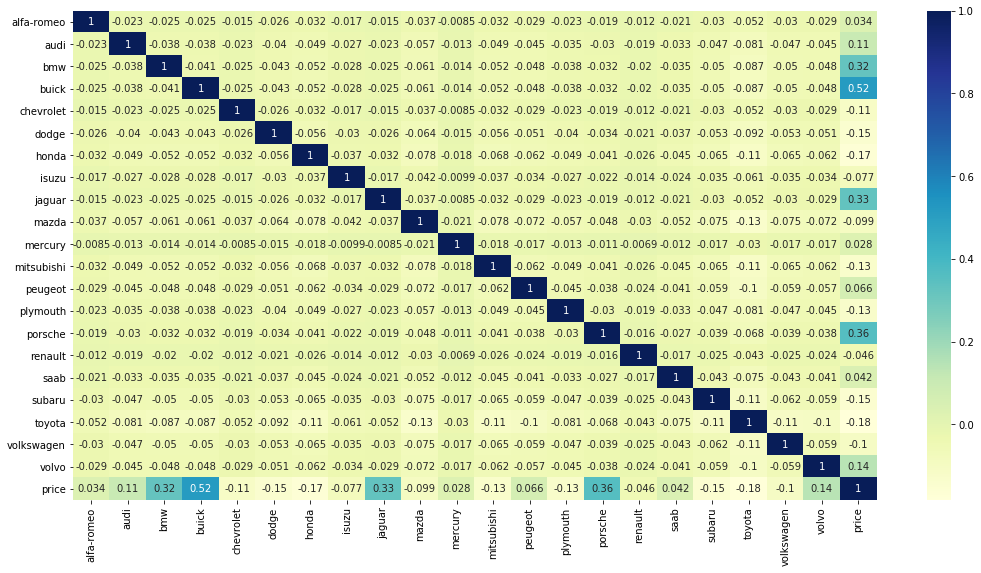

In [62]:
plt.figure(figsize=(18,9))
corr = models.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap='YlGnBu',annot=True)
plt.show()

### Model creation and further analysis

In [63]:
X = auto_dat[['symboling', 'doornumber', 'carwidth', 'carheight', 'cylindernumber',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citytohwratio', 'sizecurbwratio', 'lenbaseratio', 'gas',
       'turbo', 'rear', 'alfa-romeo', 'audi', 'bmw', 'buick', 'chevrolet',
       'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd',
       'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', '2bbl', '4bbl',
       'idi', 'mfi', 'mpfi', 'spdi', 'spfi']]

In [64]:
y=auto_dat['price']

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=70)

#### Summary of our first linear model

In [66]:
import statsmodels.api as sm      
X_train = sm.add_constant(X_train)    
lm_1 = sm.OLS(y_train,X_train).fit()

In [67]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     63.04
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           5.82e-54
Time:                        13:19:20   Log-Likelihood:                 280.03
No. Observations:                 143   AIC:                            -460.1
Df Residuals:                      93   BIC:                            -311.9
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling            0.0215      0.035  

#### Define a function for vif calculation

In [68]:
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [70]:
vif_cal(input_data=auto_dat, dependent_col="price")

C:\Users\adity\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


,Var,Vif
33,subaru,inf
46,ohcf,inf
15,rear,inf
13,gas,inf
51,idi,inf
53,mpfi,38.980000
49,2bbl,31.620000
8,horsepower,31.290000
28,peugeot,24.350000
44,l,22.570000


#### Dropping multi collinear variables in consecutive model

In [71]:
X_train = X_train.drop(['gas','idi','ohcf','rear','subaru'], 1)
lm_2 = sm.OLS(y_train,X_train).fit()
print(lm_2.summary())
vif_cal(input_data=auto_dat.drop(['gas','idi','ohcf','rear','subaru'], axis=1), dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     55.90
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           1.94e-52
Time:                        13:23:21   Log-Likelihood:                 265.14
No. Observations:                 143   AIC:                            -436.3
Df Residuals:                      96   BIC:                            -297.0
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling            0.0079      0.038  

,Var,Vif
8,horsepower,30.31
26,peugeot,23.17
41,l,21.31
36,sedan,18.24
39,rwd,17.12
48,mpfi,15.69
35,hatchback,14.78
4,cylindernumber,13.48
45,2bbl,11.71
11,sizecurbwratio,10.39


#### Drop insignificant columns/variables for creating final model, continue the process until all p value less than 0.05

In [72]:
X_train = X_train.drop('l', 1)
lm_3 = sm.OLS(y_train,X_train).fit()
print(lm_3.summary())
vif_cal(input_data=auto_dat.drop(['l','gas','idi','ohcf','rear','subaru'], axis=1), dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     55.90
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           1.94e-52
Time:                        13:23:23   Log-Likelihood:                 265.14
No. Observations:                 143   AIC:                            -436.3
Df Residuals:                      96   BIC:                            -297.0
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling            0.0079      0.038  

,Var,Vif
8,horsepower,30.28
36,sedan,18.24
39,rwd,17.04
47,mpfi,15.65
35,hatchback,14.77
4,cylindernumber,13.38
44,2bbl,11.71
11,sizecurbwratio,10.21
38,fwd,10.09
37,wagon,9.62


In [73]:
X_train = X_train.drop('symboling', 1)
lm_4 = sm.OLS(y_train,X_train).fit()
print(lm_4.summary())
vif_cal(input_data=auto_dat.drop(['l','gas','idi','ohcf','rear','subaru','symboling'], axis=1), dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     57.71
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           2.59e-53
Time:                        13:23:24   Log-Likelihood:                 265.11
No. Observations:                 143   AIC:                            -438.2
Df Residuals:                      97   BIC:                            -301.9
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
doornumber           0.0215      0.014  

,Var,Vif
7,horsepower,29.99
35,sedan,16.86
38,rwd,16.73
46,mpfi,15.50
34,hatchback,14.04
3,cylindernumber,13.18
43,2bbl,11.35
37,fwd,10.07
10,sizecurbwratio,9.92
36,wagon,9.14


In [74]:
X_train = X_train.drop('citytohwratio', 1)
lm_5 = sm.OLS(y_train,X_train).fit()
print(lm_5.summary())
vif_cal(input_data=auto_dat.drop(['l','gas','idi','ohcf','rear','subaru','symboling','citytohwratio'], axis=1), dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     59.63
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           3.33e-54
Time:                        13:23:25   Log-Likelihood:                 265.11
No. Observations:                 143   AIC:                            -440.2
Df Residuals:                      98   BIC:                            -306.9
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
doornumber           0.0216      0.014  

,Var,Vif
7,horsepower,28.20
34,sedan,16.78
37,rwd,16.33
45,mpfi,15.46
33,hatchback,13.98
3,cylindernumber,13.05
42,2bbl,11.35
9,sizecurbwratio,9.92
36,fwd,9.89
35,wagon,9.14


In [75]:
X_train = X_train.drop('fwd', 1)
lm_6 = sm.OLS(y_train,X_train).fit()
print(lm_6.summary())
vif_cal(input_data=auto_dat.drop(['l','gas','idi','ohcf','rear','subaru','symboling','citytohwratio','fwd'], axis=1), dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     61.63
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           4.22e-55
Time:                        13:23:25   Log-Likelihood:                 265.10
No. Observations:                 143   AIC:                            -442.2
Df Residuals:                      99   BIC:                            -311.8
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
doornumber           0.0216      0.014  

,Var,Vif
7,horsepower,28.14
34,sedan,16.78
44,mpfi,15.31
33,hatchback,13.97
3,cylindernumber,12.80
41,2bbl,11.25
35,wagon,9.14
9,sizecurbwratio,9.03
1,carwidth,8.03
40,rotor,7.75


In [76]:
X_train = X_train.drop('turbo', 1)
lm_7 = sm.OLS(y_train,X_train).fit()
print(lm_7.summary())
vif_cal(input_data=auto_dat.drop(['l','gas','idi','ohcf','rear','subaru','symboling','citytohwratio','fwd','turbo'], axis=1), dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     63.73
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           5.26e-56
Time:                        13:23:26   Log-Likelihood:                 265.09
No. Observations:                 143   AIC:                            -444.2
Df Residuals:                     100   BIC:                            -316.8
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
doornumber           0.0214      0.014  

,Var,Vif
7,horsepower,18.21
33,sedan,16.74
32,hatchback,13.97
3,cylindernumber,12.48
43,mpfi,12.07
40,2bbl,9.49
34,wagon,9.14
1,carwidth,7.86
39,rotor,6.90
35,rwd,6.90


In [77]:
X_train = X_train.drop('mitsubishi', 1)
lm_8 = sm.OLS(y_train,X_train).fit()
print(lm_8.summary())
vif_cal(input_data=auto_dat.drop(['l','gas','idi','ohcf','rear','subaru','symboling','citytohwratio','fwd','turbo','mitsubishi'], axis=1), dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     65.90
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           6.59e-57
Time:                        13:23:27   Log-Likelihood:                 265.06
No. Observations:                 143   AIC:                            -446.1
Df Residuals:                     101   BIC:                            -321.7
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
doornumber           0.0217      0.014  

,Var,Vif
7,horsepower,18.18
32,sedan,16.74
31,hatchback,13.96
3,cylindernumber,12.29
42,mpfi,12.04
39,2bbl,9.48
33,wagon,9.12
1,carwidth,7.83
38,rotor,6.90
34,rwd,6.86


In [78]:
X_train = X_train.drop('honda', 1)
lm_9 = sm.OLS(y_train,X_train).fit()
print(lm_9.summary())
vif_cal(input_data=auto_dat.drop(['l','gas','idi','ohcf','rear','subaru','symboling','citytohwratio','fwd','turbo','mitsubishi',
                                 'honda'], axis=1), dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     68.20
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           7.99e-58
Time:                        13:23:28   Log-Likelihood:                 265.04
No. Observations:                 143   AIC:                            -448.1
Df Residuals:                     102   BIC:                            -326.6
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
doornumber           0.0220      0.013  

,Var,Vif
7,horsepower,17.68
31,sedan,16.73
30,hatchback,13.96
3,cylindernumber,11.86
32,wagon,9.12
41,mpfi,8.95
1,carwidth,7.83
33,rwd,6.86
37,rotor,6.86
9,sizecurbwratio,6.82


In [79]:
X_train = X_train.drop('stroke', 1)
lm_10 = sm.OLS(y_train,X_train).fit()
print(lm_10.summary())
vif_cal(input_data=auto_dat.drop(['l','gas','idi','ohcf','rear','subaru','symboling','citytohwratio','fwd','turbo','mitsubishi',
                                 'honda','stroke'], axis=1), dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     70.62
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           9.55e-59
Time:                        13:23:29   Log-Likelihood:                 265.02
No. Observations:                 143   AIC:                            -450.0
Df Residuals:                     103   BIC:                            -331.5
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
doornumber           0.0220      0.013  

,Var,Vif
30,sedan,16.73
6,horsepower,14.40
29,hatchback,13.96
3,cylindernumber,10.38
31,wagon,9.12
40,mpfi,8.22
1,carwidth,7.83
32,rwd,6.86
36,rotor,6.82
8,sizecurbwratio,5.74


In [80]:
X_train = X_train.drop('plymouth', 1)
lm_11 = sm.OLS(y_train,X_train).fit()
print(lm_11.summary())
vif_cal(input_data=auto_dat.drop(['l','gas','idi','ohcf','rear','subaru','symboling','citytohwratio','fwd','turbo','mitsubishi',
                                 'honda','stroke','plymouth'], axis=1), dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     73.16
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           1.12e-59
Time:                        13:23:29   Log-Likelihood:                 265.01
No. Observations:                 143   AIC:                            -452.0
Df Residuals:                     104   BIC:                            -336.5
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
doornumber           0.0216      0.013  

,Var,Vif
29,sedan,16.68
6,horsepower,14.33
28,hatchback,13.95
3,cylindernumber,10.37
30,wagon,9.12
39,mpfi,8.11
1,carwidth,7.77
35,rotor,6.82
31,rwd,6.66
8,sizecurbwratio,5.73


In [81]:
X_train = X_train.drop('dodge', 1)
lm_12 = sm.OLS(y_train,X_train).fit()
print(lm_12.summary())
vif_cal(input_data=auto_dat.drop(['l','gas','idi','ohcf','rear','subaru','symboling','citytohwratio','fwd','turbo','mitsubishi',
                                 'honda','stroke','plymouth','dodge'], axis=1), dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     75.72
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           1.40e-60
Time:                        13:23:35   Log-Likelihood:                 264.88
No. Observations:                 143   AIC:                            -453.8
Df Residuals:                     105   BIC:                            -341.2
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
doornumber           0.0219      0.013  

,Var,Vif
28,sedan,16.68
27,hatchback,13.93
6,horsepower,13.90
3,cylindernumber,10.37
29,wagon,9.10
38,mpfi,7.91
1,carwidth,7.68
34,rotor,6.78
30,rwd,6.66
8,sizecurbwratio,5.68


In [82]:
X_train = X_train.drop('toyota', 1)
lm_13 = sm.OLS(y_train,X_train).fit()
print(lm_13.summary())
vif_cal(input_data=auto_dat.drop(['l','gas','idi','ohcf','rear','subaru','symboling','citytohwratio','fwd','turbo','mitsubishi',
                                 'honda','stroke','plymouth','dodge','toyota'], axis=1), dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     78.44
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           1.69e-61
Time:                        13:23:35   Log-Likelihood:                 264.77
No. Observations:                 143   AIC:                            -455.5
Df Residuals:                     106   BIC:                            -345.9
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
doornumber           0.0207      0.013  

,Var,Vif
27,sedan,16.31
26,hatchback,13.91
6,horsepower,13.90
3,cylindernumber,9.98
28,wagon,8.66
1,carwidth,7.68
37,mpfi,6.89
33,rotor,6.78
29,rwd,5.63
8,sizecurbwratio,5.37


In [83]:
X_train = X_train.drop('renault', 1)
lm_14 = sm.OLS(y_train,X_train).fit()
print(lm_14.summary())
vif_cal(input_data=auto_dat.drop(['l','gas','idi','ohcf','rear','subaru','symboling','citytohwratio','fwd','turbo','mitsubishi',
                                 'honda','stroke','plymouth','dodge','toyota','renault'], axis=1), dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     78.44
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           1.69e-61
Time:                        13:23:36   Log-Likelihood:                 264.77
No. Observations:                 143   AIC:                            -455.5
Df Residuals:                     106   BIC:                            -345.9
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
doornumber           0.0207      0.013  

,Var,Vif
26,sedan,16.21
25,hatchback,13.73
6,horsepower,13.31
3,cylindernumber,9.97
27,wagon,8.53
1,carwidth,7.58
32,rotor,6.75
36,mpfi,6.72
28,rwd,5.51
8,sizecurbwratio,5.24


In [84]:
X_train = X_train.drop('4bbl', 1)
lm_15 = sm.OLS(y_train,X_train).fit()
print(lm_15.summary())
vif_cal(input_data=auto_dat.drop(['l','gas','idi','ohcf','rear','subaru','symboling','citytohwratio','fwd','turbo','mitsubishi',
                                 'honda','stroke','plymouth','dodge','toyota','renault','4bbl'], axis=1), dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     78.44
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           1.69e-61
Time:                        13:23:37   Log-Likelihood:                 264.77
No. Observations:                 143   AIC:                            -455.5
Df Residuals:                     106   BIC:                            -345.9
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
doornumber           0.0207      0.013  

,Var,Vif
26,sedan,16.21
25,hatchback,13.73
6,horsepower,12.80
3,cylindernumber,9.90
27,wagon,8.53
1,carwidth,7.52
35,mpfi,6.10
28,rwd,5.39
8,sizecurbwratio,5.24
4,boreratio,4.78


In [85]:
X_train = X_train.drop('chevrolet', 1)
lm_16 = sm.OLS(y_train,X_train).fit()
print(lm_16.summary())
vif_cal(input_data=auto_dat.drop(['l','gas','idi','ohcf','rear','subaru','symboling','citytohwratio','fwd','turbo','mitsubishi',
                                 'honda','stroke','plymouth','dodge','toyota','renault','4bbl','chevrolet'], axis=1), dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     78.44
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           1.69e-61
Time:                        13:23:38   Log-Likelihood:                 264.77
No. Observations:                 143   AIC:                            -455.5
Df Residuals:                     106   BIC:                            -345.9
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
doornumber           0.0207      0.013  

,Var,Vif
25,sedan,16.21
24,hatchback,13.73
6,horsepower,12.65
3,cylindernumber,9.76
26,wagon,8.53
1,carwidth,7.40
34,mpfi,6.03
27,rwd,5.39
8,sizecurbwratio,5.24
4,boreratio,4.75


In [86]:
X_train = X_train.drop('spfi', 1)
lm_17 = sm.OLS(y_train,X_train).fit()
print(lm_17.summary())
vif_cal(input_data=auto_dat.drop(['l','gas','idi','ohcf','rear','subaru','symboling','citytohwratio','fwd','turbo','mitsubishi',
                                 'honda','stroke','plymouth','dodge','toyota','renault','4bbl','chevrolet','spfi'], axis=1), dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     79.11
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           3.87e-62
Time:                        13:23:39   Log-Likelihood:                 264.70
No. Observations:                 143   AIC:                            -457.4
Df Residuals:                     107   BIC:                            -350.7
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
doornumber           0.0208      0.012  

,Var,Vif
25,sedan,16.21
24,hatchback,13.69
6,horsepower,12.58
3,cylindernumber,9.72
26,wagon,8.53
1,carwidth,7.38
34,mpfi,5.80
27,rwd,5.33
8,sizecurbwratio,5.15
4,boreratio,4.71


In [87]:
X_train = X_train.drop('ohc', 1)
lm_18 = sm.OLS(y_train,X_train).fit()
print(lm_18.summary())
vif_cal(input_data=auto_dat.drop(['l','gas','idi','ohcf','rear','subaru','symboling','citytohwratio','fwd','turbo','mitsubishi',
                                 'honda','stroke','plymouth','dodge','toyota','renault','4bbl','chevrolet','spfi'], axis=1), dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     81.88
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           4.93e-63
Time:                        13:23:40   Log-Likelihood:                 264.50
No. Observations:                 143   AIC:                            -459.0
Df Residuals:                     108   BIC:                            -355.3
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
doornumber           0.0212      0.012  

,Var,Vif
25,sedan,16.21
24,hatchback,13.69
6,horsepower,12.58
3,cylindernumber,9.72
26,wagon,8.53
1,carwidth,7.38
34,mpfi,5.80
27,rwd,5.33
8,sizecurbwratio,5.15
4,boreratio,4.71


In [88]:
X_train = X_train.drop('boreratio', 1)
lm_19 = sm.OLS(y_train,X_train).fit()
print(lm_19.summary())
vif_cal(input_data=auto_dat.drop(['l','gas','idi','ohcf','rear','subaru','symboling','citytohwratio','fwd','turbo','mitsubishi',
                                 'honda','stroke','plymouth','dodge','toyota','renault','4bbl','chevrolet','spfi','ohc','boreratio'], axis=1), dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     84.96
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           5.65e-64
Time:                        13:23:40   Log-Likelihood:                 264.41
No. Observations:                 143   AIC:                            -460.8
Df Residuals:                     109   BIC:                            -360.1
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
doornumber           0.0211      0.012  

,Var,Vif
24,sedan,16.00
23,hatchback,13.34
5,horsepower,11.11
25,wagon,8.49
3,cylindernumber,7.43
1,carwidth,6.72
32,mpfi,5.68
26,rwd,5.26
7,sizecurbwratio,4.63
2,carheight,4.08


In [89]:
X_train = X_train.drop('alfa-romeo', 1)
lm_20 = sm.OLS(y_train,X_train).fit()
print(lm_20.summary())
vif_cal(input_data=auto_dat.drop(['l','gas','idi','ohcf','rear','subaru','symboling','citytohwratio','fwd','turbo','mitsubishi',
                                 'honda','stroke','plymouth','dodge','toyota','renault','4bbl','chevrolet','spfi','ohc','boreratio',
                                 'alfa-romeo'], axis=1), dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     88.06
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           7.02e-65
Time:                        13:23:41   Log-Likelihood:                 264.19
No. Observations:                 143   AIC:                            -462.4
Df Residuals:                     110   BIC:                            -364.6
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
doornumber           0.0217      0.012  

,Var,Vif
23,sedan,14.09
22,hatchback,11.73
5,horsepower,11.04
24,wagon,7.67
3,cylindernumber,7.33
1,carwidth,6.52
31,mpfi,5.67
25,rwd,5.19
7,sizecurbwratio,4.60
2,carheight,4.03


In [90]:
X_train = X_train.drop('lenbaseratio', 1)
lm_21 = sm.OLS(y_train,X_train).fit()
print(lm_21.summary())
vif_cal(input_data=auto_dat.drop(['l','gas','idi','ohcf','rear','subaru','symboling','citytohwratio','fwd','turbo','mitsubishi',
                                 'honda','stroke','plymouth','dodge','toyota','renault','4bbl','chevrolet','spfi','ohc','boreratio',
                                 'alfa-romeo','lenbaseratio'], axis=1), dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     91.31
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           8.76e-66
Time:                        13:23:42   Log-Likelihood:                 263.95
No. Observations:                 143   AIC:                            -463.9
Df Residuals:                     111   BIC:                            -369.1
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
doornumber           0.0217      0.012  

,Var,Vif
22,sedan,13.73
5,horsepower,10.78
21,hatchback,10.74
23,wagon,7.66
3,cylindernumber,7.33
1,carwidth,6.23
30,mpfi,5.67
24,rwd,5.12
7,sizecurbwratio,4.60
2,carheight,3.89


In [91]:
X_train = X_train.drop('mercury', 1)
lm_22 = sm.OLS(y_train,X_train).fit()
print(lm_22.summary())
vif_cal(input_data=auto_dat.drop(['l','gas','idi','ohcf','rear','subaru','symboling','citytohwratio','fwd','turbo','mitsubishi',
                                 'honda','stroke','plymouth','dodge','toyota','renault','4bbl','chevrolet','spfi','ohc','boreratio',
                                 'alfa-romeo','lenbaseratio','mercury'], axis=1), dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     94.71
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           1.11e-66
Time:                        13:23:43   Log-Likelihood:                 263.65
No. Observations:                 143   AIC:                            -465.3
Df Residuals:                     112   BIC:                            -373.5
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
doornumber           0.0229      0.012  

,Var,Vif
21,sedan,13.73
20,hatchback,10.73
5,horsepower,10.31
22,wagon,7.64
3,cylindernumber,7.26
1,carwidth,6.19
29,mpfi,5.67
23,rwd,5.11
7,sizecurbwratio,4.50
2,carheight,3.81


In [92]:
X_train = X_train.drop('mfi', 1)
lm_23 = sm.OLS(y_train,X_train).fit()
print(lm_23.summary())
vif_cal(input_data=auto_dat.drop(['l','gas','idi','ohcf','rear','subaru','symboling','citytohwratio','fwd','turbo','mitsubishi',
                                 'honda','stroke','plymouth','dodge','toyota','renault','4bbl','chevrolet','spfi','ohc','boreratio',
                                 'alfa-romeo','lenbaseratio','mercury','mfi'], axis=1), dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     98.35
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           1.37e-67
Time:                        13:23:44   Log-Likelihood:                 263.38
No. Observations:                 143   AIC:                            -466.8
Df Residuals:                     113   BIC:                            -377.9
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
doornumber           0.0236      0.012  

,Var,Vif
21,sedan,13.69
20,hatchback,10.72
5,horsepower,10.11
22,wagon,7.60
3,cylindernumber,7.24
1,carwidth,6.18
23,rwd,5.07
28,mpfi,5.02
7,sizecurbwratio,4.48
2,carheight,3.66


In [93]:
X_train = X_train.drop('compressionratio', 1)
lm_24 = sm.OLS(y_train,X_train).fit()
print(lm_24.summary())
vif_cal(input_data=auto_dat.drop(['l','gas','idi','ohcf','rear','subaru','symboling','citytohwratio','fwd','turbo','mitsubishi',
                                 'honda','stroke','plymouth','dodge','toyota','renault','4bbl','chevrolet','spfi','ohc','boreratio',
                                 'alfa-romeo','lenbaseratio','mercury','mfi','compressionratio'], axis=1), dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     102.3
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           1.60e-68
Time:                        13:23:45   Log-Likelihood:                 263.16
No. Observations:                 143   AIC:                            -468.3
Df Residuals:                     114   BIC:                            -382.4
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
doornumber         0.0232      0.012      1.

,Var,Vif
20,sedan,13.59
19,hatchback,10.72
21,wagon,7.55
4,horsepower,7.46
3,cylindernumber,6.85
1,carwidth,6.07
6,sizecurbwratio,4.41
22,rwd,4.32
27,mpfi,3.81
2,carheight,3.65


In [94]:
X_train = X_train.drop('hardtop', 1)
lm_25 = sm.OLS(y_train,X_train).fit()
print(lm_25.summary())
vif_cal(input_data=auto_dat.drop(['l','gas','idi','ohcf','rear','subaru','symboling','citytohwratio','fwd','turbo','mitsubishi',
                                 'honda','stroke','plymouth','dodge','toyota','renault','4bbl','chevrolet','spfi','ohc','boreratio',
                                 'alfa-romeo','lenbaseratio','mercury','mfi','compressionratio','hardtop'], axis=1), dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     106.2
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           2.20e-69
Time:                        13:23:46   Log-Likelihood:                 262.70
No. Observations:                 143   AIC:                            -469.4
Df Residuals:                     115   BIC:                            -386.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
doornumber         0.0237      0.012      1.

,Var,Vif
19,sedan,8.53
4,horsepower,7.46
3,cylindernumber,6.85
18,hatchback,6.19
1,carwidth,6.04
20,wagon,5.21
6,sizecurbwratio,4.38
21,rwd,4.32
26,mpfi,3.80
2,carheight,3.55


In [95]:
X_train = X_train.drop('carheight', 1)
lm_26 = sm.OLS(y_train,X_train).fit()
print(lm_26.summary())
vif_cal(input_data=auto_dat.drop(['l','gas','idi','ohcf','rear','subaru','symboling','citytohwratio','fwd','turbo','mitsubishi',
                                 'honda','stroke','plymouth','dodge','toyota','renault','4bbl','chevrolet','spfi','ohc','boreratio',
                                 'alfa-romeo','lenbaseratio','mercury','mfi','compressionratio','hardtop','carheight'], axis=1), dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     110.2
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           3.15e-70
Time:                        13:23:47   Log-Likelihood:                 262.17
No. Observations:                 143   AIC:                            -470.3
Df Residuals:                     116   BIC:                            -390.4
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
doornumber         0.0250      0.012      2.

,Var,Vif
18,sedan,8.33
3,horsepower,7.32
2,cylindernumber,6.81
17,hatchback,6.17
1,carwidth,5.98
19,wagon,4.70
5,sizecurbwratio,4.36
20,rwd,4.25
25,mpfi,3.78
22,ohcv,3.08


In [96]:
X_train = X_train.drop('rotor', 1)
lm_27 = sm.OLS(y_train,X_train).fit()
print(lm_27.summary())
vif_cal(input_data=auto_dat.drop(['l','gas','idi','ohcf','rear','subaru','symboling','citytohwratio','fwd','turbo','mitsubishi',
                                 'honda','stroke','plymouth','dodge','toyota','renault','4bbl','chevrolet','spfi','ohc','boreratio',
                                 'alfa-romeo','lenbaseratio','mercury','mfi','compressionratio','hardtop','carheight','rotor'], axis=1), dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     115.0
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           3.64e-71
Time:                        13:23:47   Log-Likelihood:                 261.89
No. Observations:                 143   AIC:                            -471.8
Df Residuals:                     117   BIC:                            -394.8
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
doornumber         0.0252      0.012      2.

,Var,Vif
18,sedan,8.31
3,horsepower,6.90
17,hatchback,6.16
2,cylindernumber,6.00
1,carwidth,5.97
19,wagon,4.67
20,rwd,4.09
24,mpfi,3.59
5,sizecurbwratio,3.52
22,ohcv,2.80


In [97]:
X_train = X_train.drop('ohcv', 1)
lm_28 = sm.OLS(y_train,X_train).fit()
print(lm_28.summary())
vif_cal(input_data=auto_dat.drop(['l','gas','idi','ohcf','rear','subaru','symboling','citytohwratio','fwd','turbo','mitsubishi',
                                 'honda','stroke','plymouth','dodge','toyota','renault','4bbl','chevrolet','spfi','ohc','boreratio',
                                 'alfa-romeo','lenbaseratio','mercury','mfi','compressionratio','hardtop','carheight','rotor',
                                 'ohcv'], axis=1), dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     120.0
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           4.26e-72
Time:                        13:23:48   Log-Likelihood:                 261.57
No. Observations:                 143   AIC:                            -473.1
Df Residuals:                     118   BIC:                            -399.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
doornumber         0.0259      0.012      2.

,Var,Vif
18,sedan,8.28
3,horsepower,6.78
17,hatchback,6.11
1,carwidth,5.96
19,wagon,4.67
20,rwd,4.08
2,cylindernumber,3.73
23,mpfi,3.55
5,sizecurbwratio,3.50
0,doornumber,2.74


In [98]:
X_train = X_train.drop('dohcv', 1)
lm_28 = sm.OLS(y_train,X_train).fit()
print(lm_28.summary())
vif_cal(input_data=auto_dat.drop(['l','gas','idi','ohcf','rear','subaru','symboling','citytohwratio','fwd','turbo','mitsubishi',
                                 'honda','stroke','plymouth','dodge','toyota','renault','4bbl','chevrolet','spfi','ohc','boreratio',
                                 'alfa-romeo','lenbaseratio','mercury','mfi','compressionratio','hardtop','carheight','rotor',
                                 'ohcv','dohcv'], axis=1), dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     124.8
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           6.69e-73
Time:                        13:23:49   Log-Likelihood:                 260.87
No. Observations:                 143   AIC:                            -473.7
Df Residuals:                     119   BIC:                            -402.6
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
doornumber         0.0266      0.012      2.

,Var,Vif
18,sedan,8.21
3,horsepower,6.64
17,hatchback,6.01
1,carwidth,5.60
19,wagon,4.65
20,rwd,4.08
22,mpfi,3.55
2,cylindernumber,3.49
5,sizecurbwratio,3.37
0,doornumber,2.73


In [99]:
X_train = X_train.drop('isuzu', 1)
lm_29 = sm.OLS(y_train,X_train).fit()
print(lm_29.summary())
vif_cal(input_data=auto_dat.drop(['l','gas','idi','ohcf','rear','subaru','symboling','citytohwratio','fwd','turbo','mitsubishi',
                                 'honda','stroke','plymouth','dodge','toyota','renault','4bbl','chevrolet','spfi','ohc','boreratio',
                                 'alfa-romeo','lenbaseratio','mercury','mfi','compressionratio','hardtop','carheight','rotor',
                                 'ohcv','dohcv','isuzu'], axis=1), dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     129.6
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           1.24e-73
Time:                        13:23:50   Log-Likelihood:                 259.95
No. Observations:                 143   AIC:                            -473.9
Df Residuals:                     120   BIC:                            -405.8
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
doornumber         0.0277      0.012      2.

,Var,Vif
17,sedan,8.10
3,horsepower,6.64
16,hatchback,5.99
1,carwidth,5.52
18,wagon,4.63
19,rwd,3.88
21,mpfi,3.52
2,cylindernumber,3.48
5,sizecurbwratio,3.37
0,doornumber,2.73


In [100]:
X_train = X_train.drop('carwidth', 1)
lm_30 = sm.OLS(y_train,X_train).fit()
print(lm_30.summary())
vif_cal(input_data=auto_dat.drop(['l','gas','idi','ohcf','rear','subaru','symboling','citytohwratio','fwd','turbo','mitsubishi',
                                 'honda','stroke','plymouth','dodge','toyota','renault','4bbl','chevrolet','spfi','ohc','boreratio',
                                 'alfa-romeo','lenbaseratio','mercury','mfi','compressionratio','hardtop','carheight','rotor',
                                 'ohcv','dohcv','isuzu','carwidth'], axis=1), dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     134.9
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           2.21e-74
Time:                        13:23:51   Log-Likelihood:                 259.06
No. Observations:                 143   AIC:                            -474.1
Df Residuals:                     121   BIC:                            -408.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
doornumber         0.0299      0.012      2.

,Var,Vif
16,sedan,7.89
15,hatchback,5.68
2,horsepower,5.38
17,wagon,4.53
18,rwd,3.87
20,mpfi,3.51
1,cylindernumber,3.44
4,sizecurbwratio,3.37
0,doornumber,2.69
19,2bbl,2.48


In [101]:
X_train = X_train.drop('spdi', 1)
lm_31 = sm.OLS(y_train,X_train).fit()
print(lm_31.summary())
vif_cal(input_data=auto_dat.drop(['l','gas','idi','ohcf','rear','subaru','symboling','citytohwratio','fwd','turbo','mitsubishi',
                                 'honda','stroke','plymouth','dodge','toyota','renault','4bbl','chevrolet','spfi','ohc','boreratio',
                                 'alfa-romeo','lenbaseratio','mercury','mfi','compressionratio','hardtop','carheight','rotor',
                                 'ohcv','dohcv','isuzu','carwidth','spdi'], axis=1), dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     140.1
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           4.78e-75
Time:                        13:23:53   Log-Likelihood:                 257.92
No. Observations:                 143   AIC:                            -473.8
Df Residuals:                     122   BIC:                            -411.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
doornumber         0.0320      0.012      2.

,Var,Vif
16,sedan,7.89
15,hatchback,5.68
17,wagon,4.53
2,horsepower,4.36
18,rwd,3.60
1,cylindernumber,3.37
4,sizecurbwratio,3.37
20,mpfi,2.87
0,doornumber,2.67
19,2bbl,2.25


In [102]:
X_train = X_train.drop('sizecurbwratio', 1)
lm_32 = sm.OLS(y_train,X_train).fit()
print(lm_32.summary())
vif_cal(input_data=auto_dat.drop(['l','gas','idi','ohcf','rear','subaru','symboling','citytohwratio','fwd','turbo','mitsubishi',
                                 'honda','stroke','plymouth','dodge','toyota','renault','4bbl','chevrolet','spfi','ohc','boreratio',
                                 'alfa-romeo','lenbaseratio','mercury','mfi','compressionratio','hardtop','carheight','rotor',
                                 'ohcv','dohcv','isuzu','carwidth','spdi','sizecurbwratio'], axis=1), dependent_col="price")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     146.2
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           9.07e-76
Time:                        13:23:54   Log-Likelihood:                 256.93
No. Observations:                 143   AIC:                            -473.9
Df Residuals:                     123   BIC:                            -414.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
doornumber         0.0328      0.012      2.

,Var,Vif
15,sedan,7.67
14,hatchback,5.39
16,wagon,4.15
2,horsepower,3.98
17,rwd,3.44
19,mpfi,2.86
1,cylindernumber,2.81
0,doornumber,2.65
18,2bbl,2.25
6,buick,1.80


#### Now comparing the test case with train dataset

In [103]:
# Adding  constant variable to test dataframe
X_test_m32 = sm.add_constant(X_test)

In [104]:
# Creating X_test_m6 dataframe by dropping variables from X_test_m6
X_test_m32 = X_test_m32.drop(['l','gas','idi','ohcf','rear','subaru','symboling','citytohwratio','fwd','turbo','mitsubishi',
                                 'honda','stroke','plymouth','dodge','toyota','renault','4bbl','chevrolet','spfi','ohc','boreratio',
                                 'alfa-romeo','lenbaseratio','mercury','mfi','compressionratio','hardtop','carheight','rotor',
                                 'ohcv','dohcv','isuzu','carwidth','spdi','sizecurbwratio'], axis=1)

In [105]:
# Making predictions
y_pred_m32 = lm_32.predict(X_test_m32)

In [106]:
y_pred_m32=y_pred_m32.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

Text(0, 0.5, 'Car Price')

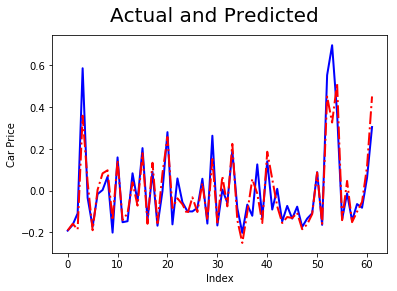

In [107]:
# Actual vs Predicted
fig = plt.figure()
plt.plot(y_test, color="blue", linewidth=2,linestyle='-') 
plt.plot(y_pred_m32, color="red",  linewidth=2,linestyle='-.')
fig.suptitle('Actual and Predicted', fontsize=20)
plt.xlabel('Index', fontsize=10)                 
plt.ylabel('Car Price', fontsize=10)           

Text(0, 0.5, 'Car Price')

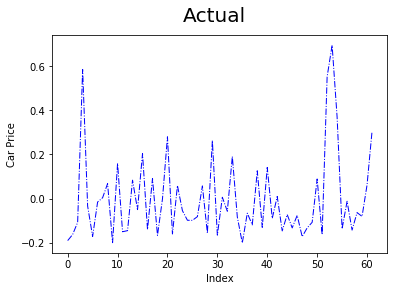

In [108]:
# Actual vs Predicted
fig = plt.figure()
plt.plot(y_test, color="blue", linewidth=1,linestyle='-.') 
fig.suptitle('Actual', fontsize=20)    
plt.xlabel('Index', fontsize=10)       
plt.ylabel('Car Price', fontsize=10)   

Text(0, 0.5, 'Car Price')

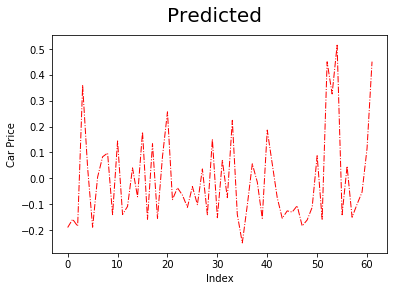

In [109]:
fig = plt.figure() 
plt.plot(y_pred_m32, color="red",  linewidth=1,linestyle='-.')
fig.suptitle('Predicted', fontsize=20)
plt.xlabel('Index', fontsize=10)      
plt.ylabel('Car Price', fontsize=10)  

Text(0, 0.5, 'y_pred')

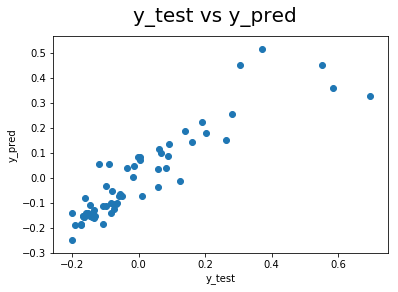

In [110]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m32)
fig.suptitle('y_test vs y_pred', fontsize=20) 
plt.xlabel('y_test', fontsize=10)             
plt.ylabel('y_pred', fontsize=10)             

C:\Users\adity\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Index')

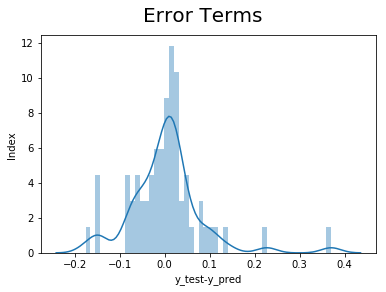

In [111]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred_m32),bins=50)
fig.suptitle('Error Terms', fontsize=20)       
plt.xlabel('y_test-y_pred', fontsize=10)       
plt.ylabel('Index', fontsize=10)               

In [112]:
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_m32)))

RMSE : 0.08231206200915975


##### Analysis Results
###### 1-Below are the major car properties affecting the price of a car
    - curbweight
    - enginesize
    - horsepower
    - cylindernumber
    - citympg
    - carwidth
    - carlength
###### 2-Brand value is also a factor that is affecting the price and major one are below
    - buick
    - bmw
    - jaguar
    - porsche

##### RMSE value is reduced to 0.082 which gives us a picture on accuracy of our test case
##### Final model (lm_32) gives us below details where R-squared and adjusted R-squared have no major deviation which supports analysis results
    R-Squared=0.960
    Adj R-Squared=0.953
###### Above signify that the model wil be able to predict the car prices to a accurate level